Loading Data

In [1]:
# read data from .arff files
import os

import sktime
from sktime.datasets import load_from_tsfile
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# load data from .csv using pd
def load_data(path):

    # load data from .csv
    data = pd.read_csv(path, header=None)

    # get labels
    y = data.iloc[:, -1].values

    # get features
    X = data.iloc[:, :-1].values

    # return features and labels
    return X, y

Loading MITBIH DATA

In [2]:
# Load mitbih data
train_x_mitbih, train_y_mitbih = load_data(
    "./datasets/ecg/mitbih_train.csv"
)
test_x_mitbih, test_y_mitbih = load_data(
    "./datasets/ecg/mitbih_test.csv"
)


MITBIH DATA VISUALIZATION

<Axes: title={'center': 'Train data mitbih'}>

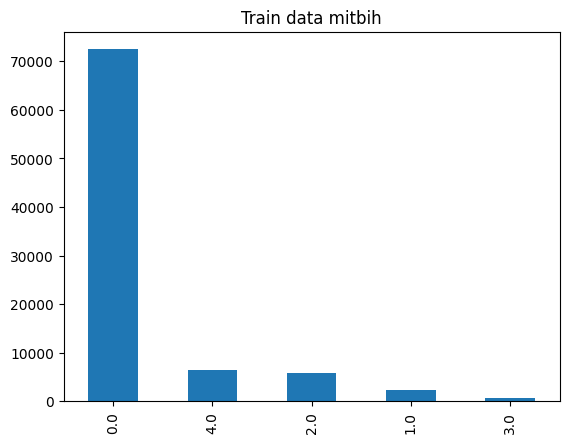

In [3]:
# Train data mitbih

# create a dataframe from the data and labels 
train_df_mitbih = pd.DataFrame(train_x_mitbih)
train_df_mitbih['label'] = train_y_mitbih

# create a plot bar from the dataframe using pandas.plot.bar
train_df_mitbih['label'].value_counts().plot.bar(title = "Train data mitbih")

<Axes: title={'center': 'Train data mitbih'}>

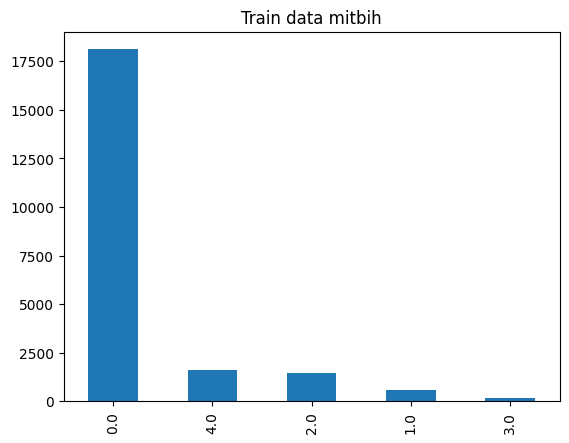

In [4]:
# Test data mitbih

# create a dataframe from the data and labels 
test_df_mitbih = pd.DataFrame(test_x_mitbih)
test_df_mitbih['label'] = test_y_mitbih

# create a plot bar from the dataframe using pandas.plot.bar
test_df_mitbih['label'].value_counts().plot.bar(title = "Train data mitbih")

<Axes: title={'center': 'Train and Test data'}>

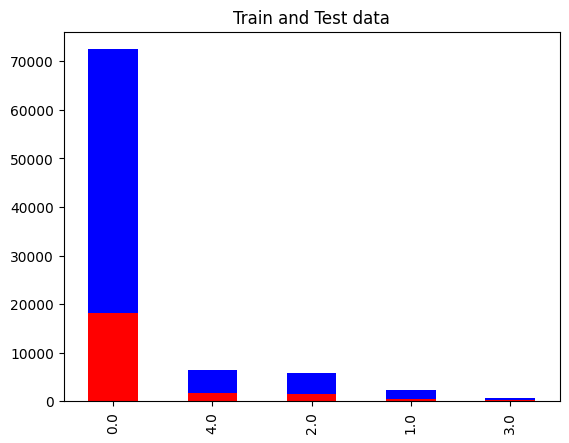

In [5]:
# put test_df and train_df on the same plot bar with different colors 
train_df_mitbih['label'].value_counts().plot.bar(title = "Train and Test data", color = 'blue', alpha = 1)
test_df_mitbih['label'].value_counts().plot.bar(color = 'red', alpha = 1)


In [6]:
# extract unique labels from the data
mitbih_labels = train_df_mitbih['label'].unique()
counts_train = train_df_mitbih['label'].value_counts()
counts_test= test_df_mitbih['label'].value_counts()


print(mitbih_labels)
print("----------------------------------")
print("TRAIN: "+  str(counts_train))
print("----------------------------------")
print("TEST: " + str(counts_test))

[0. 1. 2. 3. 4.]
----------------------------------
TRAIN: 0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: label, dtype: int64
----------------------------------
TEST: 0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: label, dtype: int64


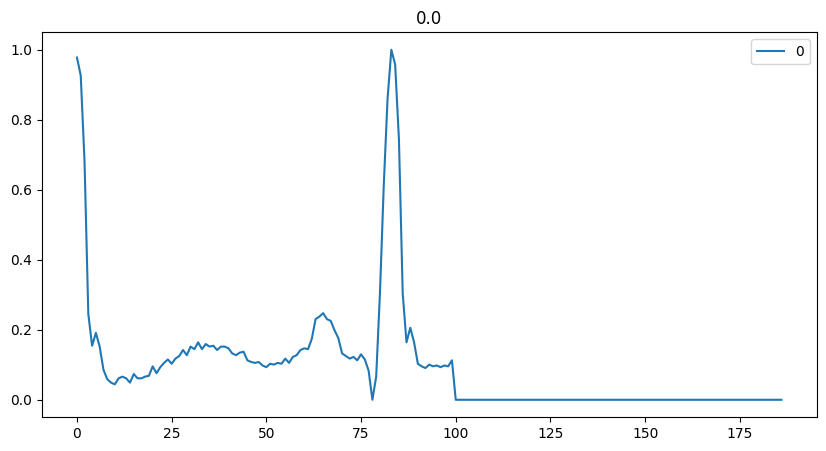

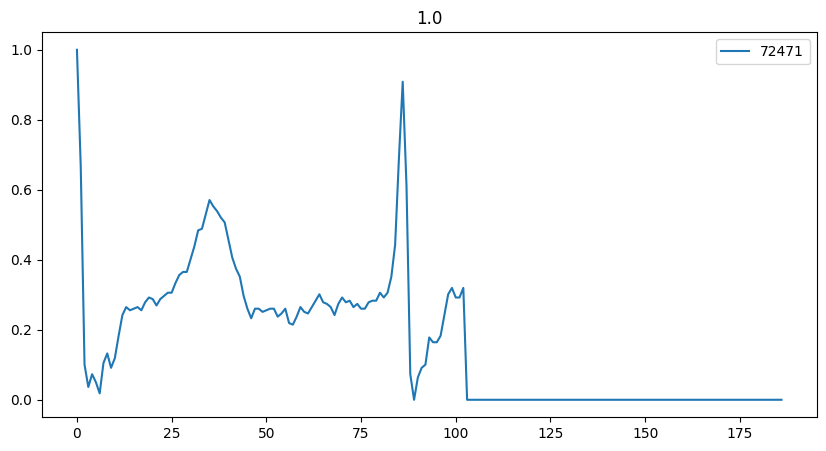

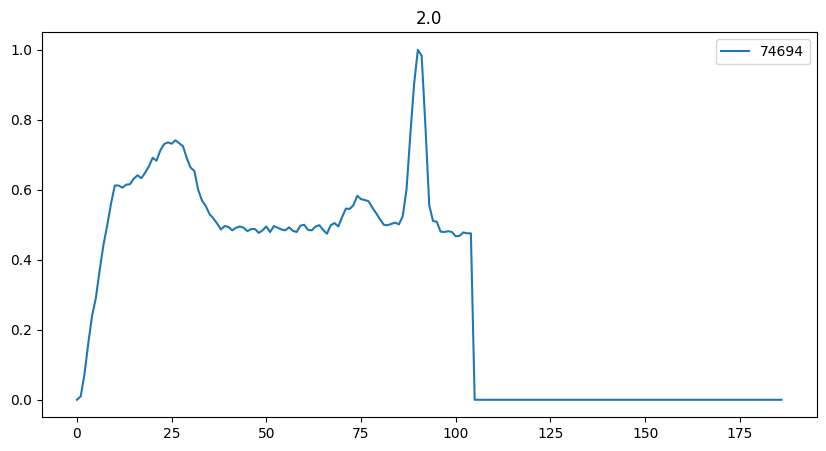

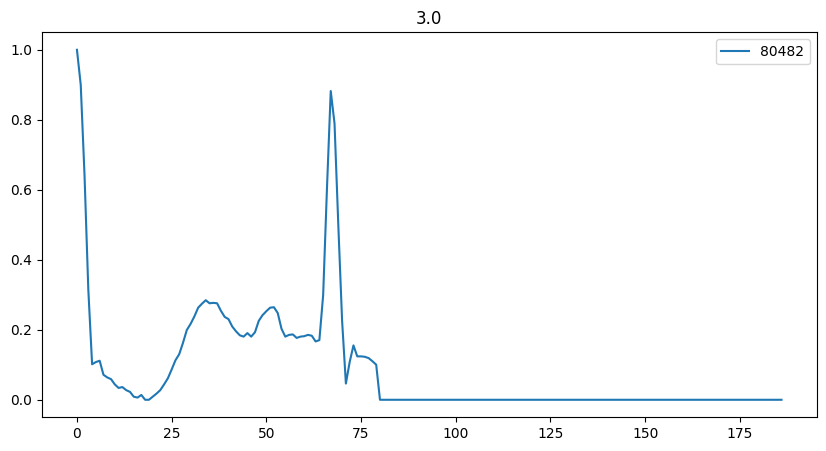

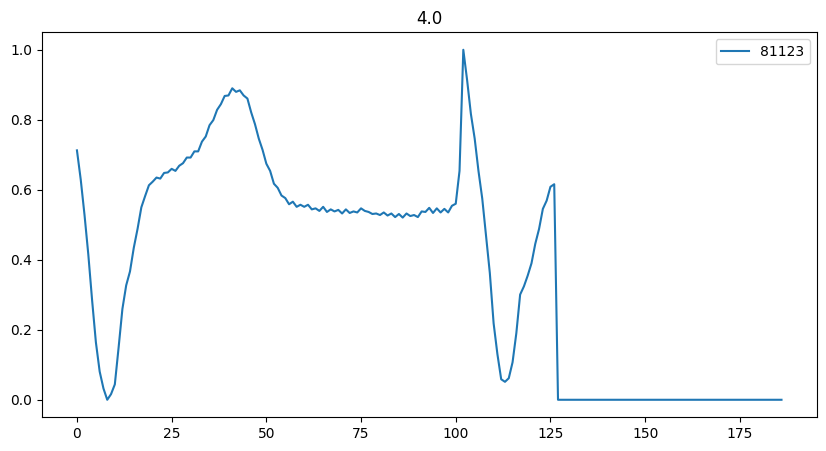

In [7]:
# for each label, plot the data#
for label in mitbih_labels:
    current = train_df_mitbih[train_df_mitbih['label'] == label].iloc[0]

    # create a dataframe from the data and labels
    current_df = pd.DataFrame(current)
    current_df = current_df.drop('label', axis = 0)
    current_df.plot(title = str(label), figsize = (10, 5))
    

MEDIA SI DEVIATIA STANDARD PER UNITATE DE TIMP

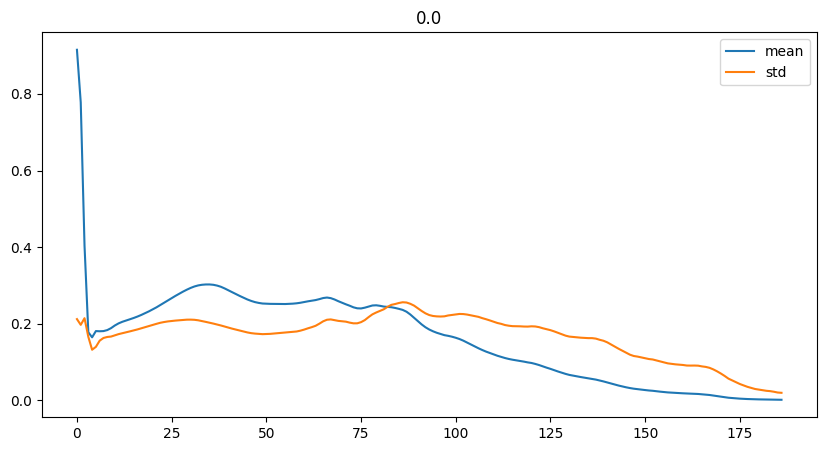

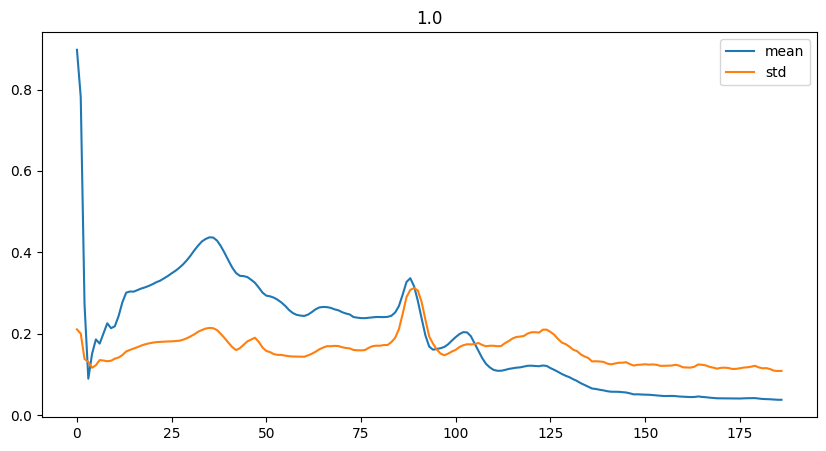

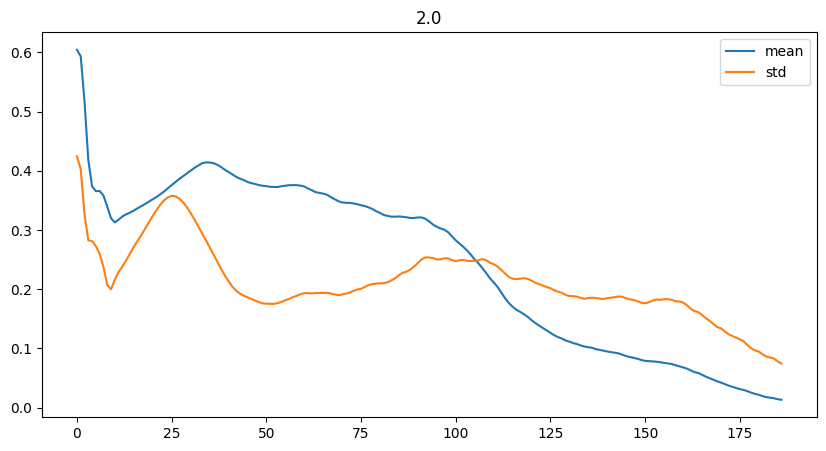

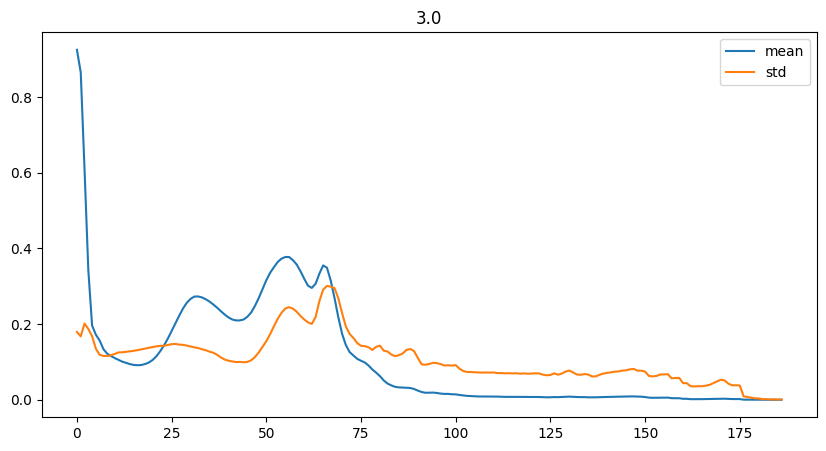

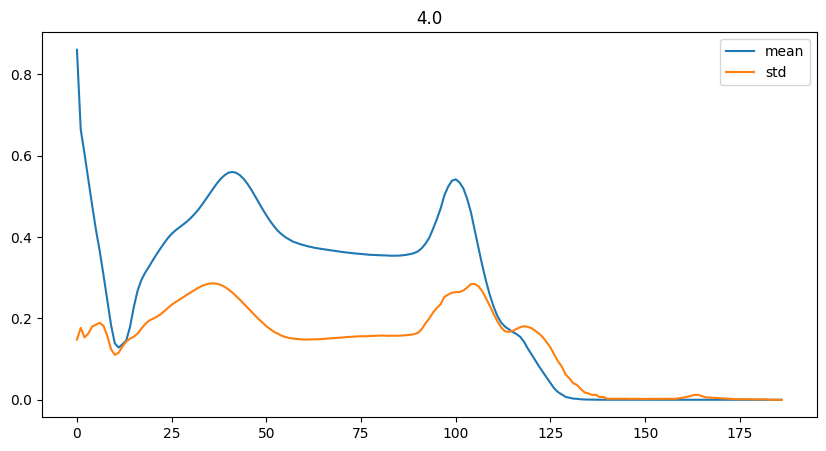

In [8]:
# Media si deviatia standard pt fiecare label pt mitbih
from matplotlib import pyplot as plt


for label in mitbih_labels:
    current = train_df_mitbih[train_df_mitbih['label'] == label]

    # create a dataframe from the data and labels
    current_df = pd.DataFrame(current)
    current_df = current_df.drop('label', axis = 1)
    current_df_mean = current_df.mean()
    current_df_std = current_df.std()
    current_df_mean.plot(title = str(label), figsize = (10, 5))
    current_df_std.plot(title = str(label), figsize = (10, 5))

    # end plot
    plt.legend(['mean', 'std'])
    plt.show()

    

3.2.2. Extragerea atributelor

In [9]:
# Setam atributele default date de intrare MITBIH pentru train
X_train_std_mitbih = pd.DataFrame(train_x_mitbih)

X_train_std_mitbih


,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Setam atributele default date de intrare MITBIH pentru test
X_test_std_mitbih = pd.DataFrame(test_x_mitbih)

X_test_std_mitbih


,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Setam atributele statistice date de intrare MITBIH pentru datele de train
X_train_statistics_mitbih = pd.DataFrame()

# Mean features
X_train_statistics_mitbih['mean'] = X_train_std_mitbih.mean(axis=1)

# Standard deviation features
X_train_statistics_mitbih['std'] = X_train_std_mitbih.std(axis=1)

# Average absolute difference features
X_train_statistics_mitbih['avg_abs_diff'] = X_train_std_mitbih.mad(axis=1)

# Min features
X_train_statistics_mitbih['min'] = X_train_std_mitbih.min(axis=1)

# Max features
X_train_statistics_mitbih['max'] = X_train_std_mitbih.max(axis=1)

# Max-min features
X_train_statistics_mitbih['max-min'] = X_train_statistics_mitbih['max'] - X_train_statistics_mitbih['min']

# Median features
X_train_statistics_mitbih['median'] = X_train_std_mitbih.median(axis=1)

# Median absolute deviation features, don't use X_train_std_mitbih.mad(axis=1) because it's the average absolute difference
# X_train_statistics_mitbih['median_abs_dev'] = (X_train_std_mitbih - X_train_statistics_mitbih['median']).abs().median(axis=1)

# Interquartile range features
X_train_statistics_mitbih['interquartile_range'] = X_train_std_mitbih.quantile(0.75, axis=1) - X_train_std_mitbih.quantile(0.25, axis=1)

# Values above mean features
# X_train_statistics_mitbih['values_above_mean'] = (X_train_std_mitbih > X_train_statistics_mitbih['mean']).sum(axis=1)

# Number of peaks features
# X_train_statistics_mitbih['number_of_peaks'] = (X_train_std_mitbih.diff(axis=1) < 0).sum(axis=1)

# Skewnness features
X_train_statistics_mitbih['skewness'] = X_train_std_mitbih.skew(axis=1)

# Kurtosis features
X_train_statistics_mitbih['kurtosis'] = X_train_std_mitbih.kurtosis(axis=1)

# Energy features
X_train_statistics_mitbih['energy'] = (X_train_std_mitbih ** 2).sum(axis=1)

# Average of absolute values features
X_train_statistics_mitbih['avg_abs_val'] = X_train_std_mitbih.abs().mean(axis=1)

# Signal magnitude area features
X_train_statistics_mitbih['signal_magnitude_area'] = X_train_std_mitbih.abs().sum(axis=1)

# Compute FFT features
fft = np.abs(np.fft.fft(X_train_std_mitbih))

# make fft data frame
fft = pd.DataFrame(fft)

# FFT mean features
X_train_statistics_mitbih['fft_mean'] = fft.mean(axis=1)

# FFT standard deviation features
X_train_statistics_mitbih['fft_std'] = fft.std(axis=1)

# FFT average absolute difference features
X_train_statistics_mitbih['fft_avg_abs_diff'] = fft.mad(axis=1)

# FFT min features
X_train_statistics_mitbih['fft_min'] = fft.min(axis=1)

# FFT max features
X_train_statistics_mitbih['fft_max'] = fft.max(axis=1)

# FFT max-min features
X_train_statistics_mitbih['fft_max-min'] = X_train_statistics_mitbih['fft_max'] - X_train_statistics_mitbih['fft_min']

# FFT median features
X_train_statistics_mitbih['fft_median'] = fft.median(axis=1)

# FFT median absolute deviation features, don't use fft.mad(axis=1) because it's the average absolute difference
# X_train_statistics_mitbih['fft_median_abs_dev'] = (fft - X_train_statistics_mitbih['fft_median']).abs().median(axis=1)

# FFT interquartile range features
X_train_statistics_mitbih['fft_interquartile_range'] = fft.quantile(0.75, axis=1) - fft.quantile(0.25, axis=1)

# FFT values above mean features
# X_train_statistics_mitbih['fft_values_above_mean'] = (fft > X_train_statistics_mitbih['fft_mean']).sum(axis=1)

# FFT number of peaks features
# X_train_statistics_mitbih['fft_number_of_peaks'] = (fft.diff(axis=1) < 0).sum(axis=1)

# FFT skewnness features
X_train_statistics_mitbih['fft_skewness'] = fft.skew(axis=1)

# FFT kurtosis features
X_train_statistics_mitbih['fft_kurtosis'] = fft.kurtosis(axis=1)

# FFT energy features
X_train_statistics_mitbih['fft_energy'] = (fft ** 2).sum(axis=1)

# FFT average of absolute values features
X_train_statistics_mitbih['fft_avg_abs_val'] = fft.abs().mean(axis=1)

# FFT signal magnitude area features
X_train_statistics_mitbih['fft_signal_magnitude_area'] = fft.abs().sum(axis=1)

X_train_statistics_mitbih

C:\Users\andre\AppData\Local\Temp\ipykernel_13596\1052935667.py:11: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  X_train_statistics_mitbih['avg_abs_diff'] = X_train_std_mitbih.mad(axis=1)
C:\Users\andre\AppData\Local\Temp\ipykernel_13596\1052935667.py:65: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  X_train_statistics_mitbih['fft_avg_abs_diff'] = fft.mad(axis=1)


,mean,std,avg_abs_diff,min,max,max-min,median,interquartile_range,skewness,kurtosis,...,fft_min,fft_max,fft_max-min,fft_median,fft_interquartile_range,fft_skewness,fft_kurtosis,fft_energy,fft_avg_abs_val,fft_signal_magnitude_area
0,0.098419,0.176545,0.098821,0.0,1.0,1.0,0.061275,0.127451,3.574941,14.029701,...,0.124106,18.404412,18.280306,0.703730,1.423335,3.497342,19.568359,1422.818305,1.720818,321.793056
1,0.090010,0.160151,0.085626,0.0,1.0,1.0,0.054131,0.089744,3.866087,16.737549,...,0.241484,16.831909,16.590425,0.793195,1.635266,3.617907,21.567215,1175.412960,1.624733,303.825096
2,0.062104,0.139142,0.075097,0.0,1.0,1.0,0.005405,0.058108,4.359641,22.804009,...,0.074545,11.613513,11.538968,0.957636,1.511143,2.896435,14.159601,808.267542,1.516143,283.518829
3,0.084084,0.161252,0.096083,0.0,1.0,1.0,0.002762,0.110497,3.505675,14.097800,...,0.351315,15.723757,15.372442,0.701249,1.177544,3.377882,16.815646,1151.650240,1.570397,293.664221
4,0.116567,0.186651,0.112355,0.0,1.0,1.0,0.056338,0.145540,3.134928,10.550815,...,0.368329,21.798122,21.429792,0.714580,1.159663,4.272667,25.916296,1686.915647,1.693052,316.600798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.158364,0.169925,0.132647,0.0,1.0,1.0,0.154386,0.242105,1.406400,3.360931,...,0.069429,29.614035,29.544606,0.796862,0.646505,6.574707,56.322569,1881.304039,1.460119,273.042327
87550,0.325508,0.293708,0.267895,0.0,1.0,1.0,0.465000,0.507500,0.177418,-1.298840,...,0.029903,60.870000,60.840097,0.722313,0.912005,7.807596,70.993992,6705.611140,2.013323,376.491407
87551,0.316665,0.275855,0.255715,0.0,1.0,1.0,0.436735,0.546939,0.029823,-1.446845,...,0.112007,59.216326,59.104319,0.859230,0.798083,8.172597,76.553161,6153.345197,2.009994,375.868802
87552,0.101807,0.161769,0.088529,0.0,1.0,1.0,0.081013,0.129114,3.682313,15.426469,...,0.056396,19.037975,18.981579,0.751192,1.207668,4.114582,26.887293,1272.666696,1.576269,294.762258


In [12]:
# Setam atributele statistice date de intrare MITBIH pentru datele de test
X_test_statistics_mitbih = pd.DataFrame()

# Mean features
X_test_statistics_mitbih['mean'] = X_test_std_mitbih.mean(axis=1)

# Standard deviation features
X_test_statistics_mitbih['std'] = X_test_std_mitbih.std(axis=1)

# Average absolute difference features
X_test_statistics_mitbih['avg_abs_diff'] = X_test_std_mitbih.mad(axis=1)

# Min features
X_test_statistics_mitbih['min'] = X_test_std_mitbih.min(axis=1)

# Max features
X_test_statistics_mitbih['max'] = X_test_std_mitbih.max(axis=1)

# Max-min features
X_test_statistics_mitbih['max-min'] = X_test_statistics_mitbih['max'] - X_test_statistics_mitbih['min']

# Median features
X_test_statistics_mitbih['median'] = X_test_std_mitbih.median(axis=1)

# Median absolute deviation features, don't use X_test_std_mitbih.mad(axis=1) because it's the average absolute difference
# X_test_statistics_mitbih['median_abs_dev'] = (X_test_std_mitbih - X_test_statistics_mitbih['median']).abs().median(axis=1)

# Interquartile range features
X_test_statistics_mitbih['interquartile_range'] = X_test_std_mitbih.quantile(0.75, axis=1) - X_test_std_mitbih.quantile(0.25, axis=1)

# Values above mean features
# X_test_statistics_mitbih['values_above_mean'] = (X_test_std_mitbih > X_test_statistics_mitbih['mean']).sum(axis=1)

# Number of peaks features
# X_test_statistics_mitbih['number_of_peaks'] = (X_test_std_mitbih.diff(axis=1) < 0).sum(axis=1)

# Skewnness features
X_test_statistics_mitbih['skewness'] = X_test_std_mitbih.skew(axis=1)

# Kurtosis features
X_test_statistics_mitbih['kurtosis'] = X_test_std_mitbih.kurtosis(axis=1)

# Energy features
X_test_statistics_mitbih['energy'] = (X_test_std_mitbih ** 2).sum(axis=1)

# Average of absolute values features
X_test_statistics_mitbih['avg_abs_val'] = X_test_std_mitbih.abs().mean(axis=1)

# Signal magnitude area features
X_test_statistics_mitbih['signal_magnitude_area'] = X_test_std_mitbih.abs().sum(axis=1)

# Compute FFT features
fft = np.abs(np.fft.fft(X_test_std_mitbih))

# make fft data frame
fft = pd.DataFrame(fft)

# FFT mean features
X_test_statistics_mitbih['fft_mean'] = fft.mean(axis=1)

# FFT standard deviation features
X_test_statistics_mitbih['fft_std'] = fft.std(axis=1)

# FFT average absolute difference features
X_test_statistics_mitbih['fft_avg_abs_diff'] = fft.mad(axis=1)

# FFT min features
X_test_statistics_mitbih['fft_min'] = fft.min(axis=1)

# FFT max features
X_test_statistics_mitbih['fft_max'] = fft.max(axis=1)

# FFT max-min features
X_test_statistics_mitbih['fft_max-min'] = X_test_statistics_mitbih['fft_max'] - X_test_statistics_mitbih['fft_min']

# FFT median features
X_test_statistics_mitbih['fft_median'] = fft.median(axis=1)

# FFT median absolute deviation features, don't use fft.mad(axis=1) because it's the average absolute difference
# X_test_statistics_mitbih['fft_median_abs_dev'] = (fft - X_test_statistics_mitbih['fft_median']).abs().median(axis=1)

# FFT interquartile range features
X_test_statistics_mitbih['fft_interquartile_range'] = fft.quantile(0.75, axis=1) - fft.quantile(0.25, axis=1)

# FFT values above mean features
# X_test_statistics_mitbih['fft_values_above_mean'] = (fft > X_test_statistics_mitbih['fft_mean']).sum(axis=1)

# FFT number of peaks features
# X_test_statistics_mitbih['fft_number_of_peaks'] = (fft.diff(axis=1) < 0).sum(axis=1)

# FFT skewnness features
X_test_statistics_mitbih['fft_skewness'] = fft.skew(axis=1)

# FFT kurtosis features
X_test_statistics_mitbih['fft_kurtosis'] = fft.kurtosis(axis=1)

# FFT energy features
X_test_statistics_mitbih['fft_energy'] = (fft ** 2).sum(axis=1)

# FFT average of absolute values features
X_test_statistics_mitbih['fft_avg_abs_val'] = fft.abs().mean(axis=1)

# FFT signal magnitude area features
X_test_statistics_mitbih['fft_signal_magnitude_area'] = fft.abs().sum(axis=1)

X_test_statistics_mitbih

C:\Users\andre\AppData\Local\Temp\ipykernel_13596\1333685670.py:11: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  X_test_statistics_mitbih['avg_abs_diff'] = X_test_std_mitbih.mad(axis=1)
C:\Users\andre\AppData\Local\Temp\ipykernel_13596\1333685670.py:65: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  X_test_statistics_mitbih['fft_avg_abs_diff'] = fft.mad(axis=1)


,mean,std,avg_abs_diff,min,max,max-min,median,interquartile_range,skewness,kurtosis,...,fft_min,fft_max,fft_max-min,fft_median,fft_interquartile_range,fft_skewness,fft_kurtosis,fft_energy,fft_avg_abs_val,fft_signal_magnitude_area
0,0.080413,0.138679,0.072396,0.0,1.0,1.0,0.053719,0.102273,4.467236,23.851133,...,0.295702,15.037190,14.741489,1.063307,1.847862,4.095577,30.885448,895.036910,1.558762,291.488519
1,0.196353,0.236600,0.204620,0.0,1.0,1.0,0.029304,0.340659,1.014114,0.386610,...,0.275107,36.717950,36.442842,0.720290,1.191162,6.368459,48.408991,3295.288975,1.825842,341.432514
2,0.112063,0.137927,0.099205,0.0,1.0,1.0,0.101770,0.185841,2.529650,11.305646,...,0.129770,20.955752,20.825982,0.859521,0.994105,6.607888,54.571546,1100.830879,1.360757,254.461491
3,0.161664,0.208151,0.158527,0.0,1.0,1.0,0.122917,0.275000,1.795731,3.983538,...,0.375136,30.231250,29.856114,0.805968,0.877281,5.744042,42.958203,2420.921925,1.807163,337.939545
4,0.201629,0.206426,0.173879,0.0,1.0,1.0,0.231544,0.338926,0.972238,1.288681,...,0.100986,37.704698,37.603712,0.540384,0.623496,7.164569,60.913447,2903.768623,1.518837,284.022574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.330364,0.300187,0.269984,0.0,1.0,1.0,0.434483,0.512069,0.222835,-1.279024,...,0.071058,61.778161,61.707102,0.754811,1.030771,7.642947,70.350419,6950.824542,2.207689,412.837851
21888,0.394955,0.330448,0.304676,0.0,1.0,1.0,0.562033,0.642003,-0.068627,-1.525081,...,0.136240,73.856502,73.720263,0.838157,0.907452,8.161470,77.901220,9252.823388,2.300222,430.141448
21889,0.106412,0.149061,0.094338,0.0,1.0,1.0,0.091988,0.148368,3.169188,13.917826,...,0.059661,19.899110,19.839449,0.994129,1.133404,5.379777,42.940742,1168.802289,1.569157,293.432270
21890,0.189882,0.191647,0.146175,0.0,1.0,1.0,0.214286,0.265873,1.261984,2.530023,...,0.086271,35.507937,35.421666,1.004210,0.864191,7.055430,65.589660,2538.310659,1.781166,333.078010


Models

In [ ]:
# SVM with standard parameters MITBIH
svm_std_parameters_mitbih = SVC()
svm_std_parameters_mitbih.fit(X_train_std_mitbih, train_y_mitbih)

# print prediction results
predictions = svm_std_parameters_mitbih.predict(X_test_std_mitbih)
print(classification_report(test_y_mitbih, predictions))


           precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18118
         1.0       0.96      0.56      0.71       556
         2.0       0.97      0.86      0.91      1448
         3.0       0.75      0.48      0.59       162
         4.0       1.00      0.91      0.95      1608

    accuracy                           0.97     21892
   macro avg       0.93      0.76      0.83     21892
weighted avg       0.97      0.97      0.97     21892

In [ ]:
# Variance Threshold
VARIANCE_THRESHOLD = 0
SELECT_PERCENTILE = 90


In [ ]:
sel = VarianceThreshold(threshold=VARIANCE_THRESHOLD)

# Variance Threshold MITBIH 
X_train_variance_mitbih = X_train_std_mitbih.copy()
X_test_variance_mitbih = X_test_std_mitbih.copy()

sel.fit_transform(X_train_variance_mitbih)
sel.fit_transform(X_test_variance_mitbih)

# transform X_train to ndarray
X_train_variance_mitbih = sel.transform(X_train_variance_mitbih)
X_test_variance_mitbih = sel.transform(X_test_variance_mitbih)

print(X_test_variance_mitbih.shape)

In [ ]:
# Select Percentile mitbih
X_train_percentile_mitbih = X_train_std_mitbih.copy()

X_test_percentile_mitbih = X_test_std_mitbih.copy()

# add columns name to X_test_percentile x1, x2, x3, , xn
X_test_percentile_mitbih.columns = [f'x{i}' for i in range(1, X_test_percentile_mitbih.shape[1] + 1)]

# add columns name to X_train_percentile x1, x2, x3, , xn
X_train_percentile_mitbih.columns = [f'x{i}' for i in range(1, X_train_percentile_mitbih.shape[1] + 1)]

X_train_percentile_mitbih = SelectPercentile(percentile=SELECT_PERCENTILE).fit(X_train_percentile_mitbih, train_y_mitbih)

train_features_names_mitbih = X_train_percentile_mitbih.get_feature_names_out()

X_train_percentile_mitbih = X_train_percentile_mitbih.transform(X_train_std_mitbih)

# Remove features using SelectPercentile from X_test_percentile using the same features
X_test_percentile_mitbih = X_test_percentile_mitbih[train_features_names_mitbih]

print(X_train_percentile_mitbih)


In [ ]:
# SVM with standard parameters MITBIH with variance threshold
svm_std_parameters_mitbih_variance = SVC()
svm_std_parameters_mitbih_variance.fit(X_train_variance_mitbih, train_y_mitbih)

# print prediction results
predictions = svm_std_parameters_mitbih_variance.predict(X_test_variance_mitbih)

print(classification_report(test_y_mitbih, predictions))

VARIANCE 0

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18118
         1.0       0.96      0.56      0.71       556
         2.0       0.97      0.86      0.91      1448
         3.0       0.75      0.48      0.59       162
         4.0       1.00      0.91      0.95      1608

    accuracy                           0.97     21892
   macro avg       0.93      0.76      0.83     21892
weighted avg       0.97      0.97      0.97     21892

In [ ]:
# SVM with standard parameters MITBIH with percentile threshold
svm_std_parameters_mitbih_percentile = SVC()
svm_std_parameters_mitbih_percentile.fit(X_train_percentile_mitbih, train_y_mitbih)

# print prediction results
predictions = svm_std_parameters_mitbih_percentile.predict(X_test_percentile_mitbih)

print(classification_report(test_y_mitbih, predictions))

PERCENTILE 70

             precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18118
         1.0       0.97      0.56      0.71       556
         2.0       0.96      0.88      0.92      1448
         3.0       0.80      0.53      0.64       162
         4.0       1.00      0.90      0.95      1608

    accuracy                           0.97     21892
   macro avg       0.94      0.77      0.84     21892
weighted avg       0.97      0.97      0.97     21892

PERCENTILE 30

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     18118
         1.0       0.95      0.55      0.70       556
         2.0       0.95      0.80      0.87      1448
         3.0       0.92      0.28      0.43       162
         4.0       1.00      0.90      0.94      1608

    accuracy                           0.96     21892
   macro avg       0.95      0.71      0.78     21892
weighted avg       0.96      0.96      0.96     21892

PERCENTILE 10

            precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     18118
         1.0       0.84      0.51      0.63       556
         2.0       0.94      0.60      0.73      1448
         3.0       0.88      0.04      0.08       162
         4.0       0.97      0.86      0.91      1608

    accuracy                           0.94     21892
   macro avg       0.91      0.60      0.66     21892
weighted avg       0.94      0.94      0.93     21892

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']} 

CV = 3

In [ ]:
# SVM with GridSearchCV MITBIH with all features

svm_model_all_features_mitbih = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

svm_model_all_features_mitbih.fit(X_train_std_mitbih, train_y_mitbih)

print(svm_model_all_features_mitbih.best_params_)

# print prediction results
predictions = svm_model_all_features_mitbih.predict(X_test_std_mitbih)

print(classification_report(test_y_mitbih, predictions))


In [ ]:
# SVM   with GridSearchCV MITBIH with variance threshold

svm_model_variance_mitbih = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=CV)

svm_model_variance_mitbih.fit(X_train_variance_mitbih, train_y_mitbih)

print(svm_model_variance_mitbih.best_params_)

# print prediction results
predictions = svm_model_variance_mitbih.predict(X_test_variance_mitbih)

print(classification_report(test_y_mitbih, predictions))

In [ ]:
# SVM with GridSearchCV MITBIH with percentile threshold

svm_model_percentile_mitbih = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

svm_model_percentile_mitbih.fit(X_train_percentile_mitbih, train_y_mitbih)

print(svm_model_percentile_mitbih.best_params_)

# print prediction results

predictions = svm_model_percentile_mitbih.predict(X_test_percentile_mitbih)

print(classification_report(test_y_mitbih, predictions))

In [ ]:
# Random Forest with standard parameters MITBIH with all features

rf_std_parameters_mitbih = RandomForestClassifier()

rf_std_parameters_mitbih.fit(X_train_std_mitbih, train_y_mitbih)

# print prediction results
predictions = rf_std_parameters_mitbih.predict(X_test_std_mitbih)

print(classification_report(test_y_mitbih, predictions))

In [ ]:
# Random Forest with standard parameters MITBIH with variance threshold

rf_std_parameters_mitbih_variance = RandomForestClassifier()

rf_std_parameters_mitbih_variance.fit(X_train_variance_mitbih, train_y_mitbih)

# print prediction results

predictions = rf_std_parameters_mitbih_variance.predict(X_test_variance_mitbih)

print(classification_report(test_y_mitbih, predictions))

In [ ]:
# Random Forest with standard parameters MITBIH with percentile threshold

rf_std_parameters_mitbih_percentile = RandomForestClassifier()

rf_std_parameters_mitbih_percentile.fit(X_train_percentile_mitbih, train_y_mitbih)

# print prediction results

predictions = rf_std_parameters_mitbih_percentile.predict(X_test_percentile_mitbih)

print(classification_report(test_y_mitbih, predictions))

In [ ]:
param_grid = {'n_estimators': [100, 200, 300, 400],
                'max_features': ['sqrt', 'log2'],
                'max_depth' : [5,6,7],
                'criterion' :['gini', 'entropy']}

In [ ]:
# Random Forest with GridSearchCV MITBIH with all features

rf_model_all_features_mitbih = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3, cv=CV)

rf_model_all_features_mitbih.fit(X_train_std_mitbih, train_y_mitbih)

print(rf_model_all_features_mitbih.best_params_)

# print prediction results

predictions = rf_model_all_features_mitbih.predict(X_test_std_mitbih)

print(classification_report(test_y_mitbih, predictions))

In [ ]:
# Random Forest with GridSearchCV MITBIH with variance threshold

rf_model_variance_mitbih = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3, cv=CV)

rf_model_variance_mitbih.fit(X_train_variance_mitbih, train_y_mitbih)

print(rf_model_variance_mitbih.best_params_)

# print prediction results

predictions = rf_model_variance_mitbih.predict(X_test_variance_mitbih)

print(classification_report(test_y_mitbih, predictions))

In [ ]:
# Random Forest with GridSearchCV MITBIH with percentile threshold

rf_model_percentile_mitbih = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3, cv=2)

rf_model_percentile_mitbih.fit(X_train_percentile_mitbih, train_y_mitbih)

print(rf_model_percentile_mitbih.best_params_)

# print prediction results

predictions = rf_model_percentile_mitbih.predict(X_test_percentile_mitbih)

print(classification_report(test_y_mitbih, predictions))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
